### Observable trends

Analyzing the scatter plot we can observe a clear dependency between latitude and temperature. The closer we get to the ecuator the higher the recorded temperatures are. Converserly the farther away from the ecuator, either north or south, the lower the temperatures are.

There are also less cities in around the ecuator where the humidity level is lower than 50%. High humidity can cause higher temperatures.


In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy as ow

from datetime import datetime

# Import API key
from config import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Settings openweathermappy
settings = {"units": "imperial", "appid": owm_api_key}
# Key data to extract
citydata = ["name","sys.country","dt","main.temp_max","coord.lat","coord.lon","wind.speed",\
            "main.humidity","clouds.all"]
# Column names for dataframe
column_names = ["City","Country","Date","Max Temp","Latitude","Longitude","Wind Speed",\
            "Humidity","Cloudiness"]

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Create list of cities (city_name,country_Code) using citipy  
cities = [f"{citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name},\
{citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code}" for lat_lng in lat_lngs]

# Remove duplicates
cities = list(set(cities))

In [5]:
len(cities)

630

In [6]:
# Function to loop thru each set of cities and request their weather info
# Return a DataFrame of cities
def getCityWeather(cities, setNumber, rowsPerset):
    
    # Calculate first and last rows for the set
    numberOfCities = len(cities)
    firstRow = (rowsPerset * setNumber) - rowsPerset
    lastRow = (rowsPerset * setNumber) 
    if lastRow > numberOfCities:
        lastRow = numberOfCities
    
    # Initialize output message and DataFrame
    output_message = ""
    city_weather = pd.DataFrame(columns=column_names)

    # Loop thru the set of cities and request wheather info
    for recordNo, city in enumerate(cities[firstRow:lastRow]):
        if setNumber == 1:
            recordNo = recordNo + 1
        
        output_message = output_message + f"Processing Record: {recordNo} of Set {setNumber} | {city}\n"
        try:
            weather_data = ow.get_current(city, **settings)
            city_data = pd.DataFrame([list(weather_data.get_many(citydata))],columns=column_names)
            city_weather = pd.concat([city_weather,city_data])
        except Exception as e:
            output_message = output_message + f"City not found. Skipping...\n"
    
    # Print and output the log
    print(output_message)
    with open(output_data_file, "a") as output_file:
        output_file.writelines(output_message)
    
    return(city_weather)

In [7]:
# Rows to process per each set. 
rowsPerSet = 50
numberOfCities = len(cities)

# Calculate total number based on the rowsPerSet value
totalSets = int(numberOfCities / rowsPerSet) + 1
if (numberOfCities % rowsPerSet) != 0:
    totalSets = totalSets + 1

# Create empty DataFrame
city_weather_df = pd.DataFrame(columns=column_names)

# Loop thru the totalSets and build final DataFrame
for i in range(1,totalSets):
    city_weather_df = pd.concat([city_weather_df,getCityWeather(cities, i, rowsPerSet)])

city_weather_df = city_weather_df.reset_index()


Processing Record: 1 of Set 1 | scottsbluff,us
Processing Record: 2 of Set 1 | wasilla,us
Processing Record: 3 of Set 1 | chokurdakh,ru
Processing Record: 4 of Set 1 | sur,om
Processing Record: 5 of Set 1 | teya,ru
Processing Record: 6 of Set 1 | formosa,br
Processing Record: 7 of Set 1 | egvekinot,ru
Processing Record: 8 of Set 1 | williams lake,ca
Processing Record: 9 of Set 1 | puerto escondido,mx
Processing Record: 10 of Set 1 | tasiilaq,gl
Processing Record: 11 of Set 1 | hita,jp
Processing Record: 12 of Set 1 | puerto triunfo,co
Processing Record: 13 of Set 1 | brnakot,am
Processing Record: 14 of Set 1 | hoquiam,us
Processing Record: 15 of Set 1 | la paz,mx
Processing Record: 16 of Set 1 | victoria,sc
Processing Record: 17 of Set 1 | fare,pf
Processing Record: 18 of Set 1 | eskasem,af
City not found. Skipping...
Processing Record: 19 of Set 1 | tabou,ci
Processing Record: 20 of Set 1 | deputatskiy,ru
Processing Record: 21 of Set 1 | berdsk,ru
Processing Record: 22 of Set 1 | bayk

Processing Record: 0 of Set 5 | port shepstone,za
Processing Record: 1 of Set 5 | hulan ergi,cn
Processing Record: 2 of Set 5 | fredericton,ca
Processing Record: 3 of Set 5 | barrow,us
Processing Record: 4 of Set 5 | hasaki,jp
Processing Record: 5 of Set 5 | herat,af
Processing Record: 6 of Set 5 | shelburne,ca
Processing Record: 7 of Set 5 | kakanj,ba
Processing Record: 8 of Set 5 | kennett,us
Processing Record: 9 of Set 5 | saldanha,za
Processing Record: 10 of Set 5 | oskarshamn,se
Processing Record: 11 of Set 5 | lasa,cn
City not found. Skipping...
Processing Record: 12 of Set 5 | morropon,pe
Processing Record: 13 of Set 5 | matara,lk
Processing Record: 14 of Set 5 | katha,mm
City not found. Skipping...
Processing Record: 15 of Set 5 | iracoubo,gf
Processing Record: 16 of Set 5 | ixtapa,mx
Processing Record: 17 of Set 5 | nikolskoye,ru
Processing Record: 18 of Set 5 | maragogi,br
Processing Record: 19 of Set 5 | north bend,us
Processing Record: 20 of Set 5 | puerto leguizamo,co
Proc

Processing Record: 0 of Set 9 | malinovoye ozero,ru
Processing Record: 1 of Set 9 | saint anthony,ca
City not found. Skipping...
Processing Record: 2 of Set 9 | koryukivka,ua
Processing Record: 3 of Set 9 | provideniya,ru
Processing Record: 4 of Set 9 | talaya,ru
Processing Record: 5 of Set 9 | acapulco,mx
Processing Record: 6 of Set 9 | kasimbazar,in
City not found. Skipping...
Processing Record: 7 of Set 9 | pedernales,do
Processing Record: 8 of Set 9 | monte patria,cl
Processing Record: 9 of Set 9 | pevek,ru
Processing Record: 10 of Set 9 | vaitupu,wf
City not found. Skipping...
Processing Record: 11 of Set 9 | jalu,ly
Processing Record: 12 of Set 9 | lakhimpur,in
Processing Record: 13 of Set 9 | anton lizardo,mx
Processing Record: 14 of Set 9 | bairiki,ki
City not found. Skipping...
Processing Record: 15 of Set 9 | wakkanai,jp
Processing Record: 16 of Set 9 | husavik,is
Processing Record: 17 of Set 9 | arona,es
Processing Record: 18 of Set 9 | bolungarvik,is
City not found. Skippin

Processing Record: 0 of Set 13 | sao filipe,cv
Processing Record: 1 of Set 13 | rancharia,br
Processing Record: 2 of Set 13 | kuusamo,fi
Processing Record: 3 of Set 13 | smolenka,ru
Processing Record: 4 of Set 13 | monrovia,lr
Processing Record: 5 of Set 13 | barabinsk,ru
Processing Record: 6 of Set 13 | tabulbah,tn
City not found. Skipping...
Processing Record: 7 of Set 13 | yellowknife,ca
Processing Record: 8 of Set 13 | saryshagan,kz
City not found. Skipping...
Processing Record: 9 of Set 13 | guanica,us
City not found. Skipping...
Processing Record: 10 of Set 13 | porto walter,br
Processing Record: 11 of Set 13 | nemuro,jp
Processing Record: 12 of Set 13 | mount gambier,au
Processing Record: 13 of Set 13 | nanortalik,gl
Processing Record: 14 of Set 13 | palmerston,au
Processing Record: 15 of Set 13 | lucapa,ao
Processing Record: 16 of Set 13 | temerloh,my
Processing Record: 17 of Set 13 | haines junction,ca
Processing Record: 18 of Set 13 | jimenez,mx
Processing Record: 19 of Set 1

In [8]:
# Get process date for plot titles
process_date = datetime.utcfromtimestamp(city_weather_df.iloc[0]["Date"]).strftime('%m/%d/%y')

# Assign float data type to all relevant columns
city_weather_df["Humidity"] = city_weather_df["Humidity"].astype(float)
city_weather_df["Max Temp"] = city_weather_df["Max Temp"].astype(float)
city_weather_df["Cloudiness"] = city_weather_df["Cloudiness"].astype(float)
city_weather_df["Wind Speed"] = city_weather_df["Wind Speed"].astype(float)

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (07/09/19)')

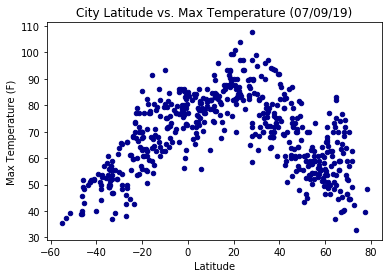

In [9]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Max Temp", c="DarkBlue")
ax.set_ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Humidity (07/09/19)')

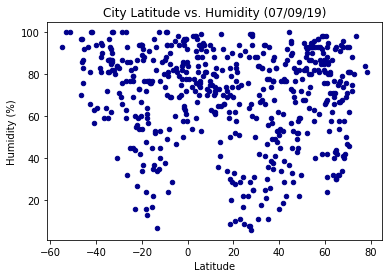

In [10]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Humidity", c="DarkBlue")
ax.set_ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (07/09/19)')

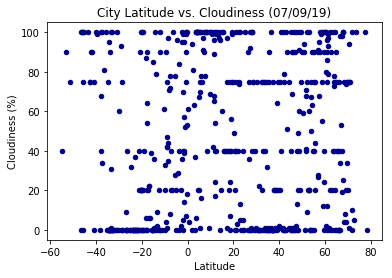

In [11]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Cloudiness", c="DarkBlue")
ax.set_ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({process_date})")

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (07/09/19)')

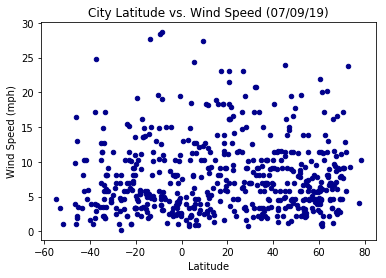

In [12]:
ax = city_weather_df.plot.scatter(x="Latitude", y="Wind Speed", c="DarkBlue")
ax.set_ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({process_date})")